# First visit Monte-Carlo implementation 

## import libraries 

In [1]:
import gym
from tqdm import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt

## Load FrozenLake environment with slippery  

In [32]:
env = gym.make("FrozenLake-v0", is_slippery = True)

## define opt_action function to choose next state based on top state value   

In [33]:
def opt_action(env,s):
  values = []
  for action in range(env.action_space.n):
      if len(env.env.P[s][action]) > 1:
        next_state = env.env.P[s][action][1][1]
      else:
        next_state = env.env.P[s][action][0][1]
      values.append(v[next_state])
  action = np.argmax(values)
  return action

## implement first visit monte carlo

### we have 100 iteration and 5000 episode in each iteration to find optimal policy and test this policy for 50 times

In [34]:
w_r = []
EPISODE_NUM = 5000
TEST_NUM = 50
Gamma = 0.9
for k in tqdm(range(100)):
  v = [0 for i in range(env.observation_space.n)]
  win_rates = []
  returns = {}
  for s in range(env.observation_space.n):
      returns[s] = []
  for j in range(EPISODE_NUM):
    env.reset()
    s= env.s
    states_rewards = []
    done = False
    while not done:
      action = opt_action(env,s) if random.random()>0.3 else env.action_space.sample()
      observation, reward, done, _ = env.step(action)
      states_rewards.append((s,reward))
      s = observation
    G = 0
    states_returns = []
    for s,r in reversed(states_rewards):
      G = Gamma * G + r
      states_returns.append((s,G))
    states_returns.reverse() 
    seen_states = []    
    for s, G in states_returns:
        if s not in seen_states:
            returns[s].append(G)
            v[s] = np.mean(returns[s])
            seen_states.append(s)
    
    policy = []
    for s in range(env.observation_space.n):
      policy.append(opt_action(env,s))
    win_rate = 0
    steps = [0 for i in range(TEST_NUM)]
    for i in range(TEST_NUM):
      env.reset()
      done = False
      s = 0
      while not done:
        s, r, done, _ = env.step(policy[s])
        steps[i] += 1
      if r>0:
        win_rate += 1
    win_rates.append(win_rate/100)
  w_r.append(win_rates)

100%|██████████| 100/100 [44:34<00:00, 26.75s/it]


after 44m:34s, we have final policy

In [35]:
print(policy)

[1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 1, 0]


u can see mean of win rates on each iteration

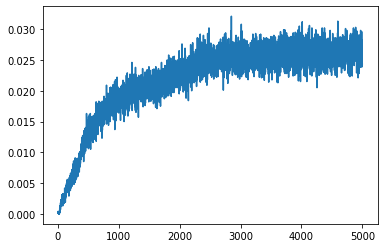

In [36]:
plt.plot(np.mean(w_r, axis = 0))